In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path
import pickle

In [2]:
hefty = pd.read_csv('hefty_df.csv')

In [42]:
def get_saved_recipes(): 
    '''Gets the saved recipes and returns them'''
    if os.path.exists('recipes.pickle'): # checks if the folder already exists
        print("folder already here: returning contents")
        with open('recipes.pickle','rb') as f:
            recipes = pickle.load(f) # load the saved contents 
            return recipes
    else:
        print("folder not here yet.  Run contents from 'Scraper.ipynb' "
              "to create the folder")

In [44]:
recipes = get_saved_recipes()

folder already here: returning contents


In [46]:
def get_recipe_df(name):
    '''
    gets the pickled recipe dataframe from the name specified
    '''
    print('Unpickling dataframe')
    
    with open(name,'rb') as f:
        df = pickle.load(f) # save the contents
            
    return df

recipe_df = get_recipe_df('recipe_df.pickle')

Unpickling dataframe


In [56]:
broken_recipes = {21,67,715,803,1109,2150,2347,2776,  ## These are the row numbers of recipes that I found broke some
                  3355,3356,3419,3420,4785,4786,4787, ## Code during the cleaning process; upon investigation, I don't
                  4788,4792,4800,5086,5089,5092,5162,5228} # want these!  Many are just tips/tricks, and the others are poorly formated.
good_hefty = hefty.drop(broken_recipes)
good_hefty = good_hefty.reset_index(drop=True)

In [159]:
rni = recipe_df.iloc[:,:3].join(good_hefty.iloc[:,-142:],how='outer')

In [160]:
# turn the serving sizes from strings to ints.  Also 
# turn the 0 values to 1 (I assume that if the serving size
# is put as 0, that really it is for 1 person.  Why would
# people be cooking this recipe unless it was for at least 1
# person to eat!?)
rni['serving size'] = rni['serving size'].astype(int)
serv_non_zero = rni['serving size'] != 0
rni['serving size'].where(serv_non_zero,1,inplace = True)

In [161]:
# go though and scale down all the nutritional data by the 
# serving size.
srni = rni.copy()
ss_scale = rni.iloc[:,2]
for i in range(3,3+len(rni.iloc[0,4:])):
    srni.iloc[:,i] = rni.iloc[:,i]/ss_scale

In [217]:
amino_acids = ['Alanine','Arginine','Aspartic acid','Cystine','Glutamic acid','Glycine',
               'Histidine','Isoleucine','Leucine','Lysine','Methionine',
               'Phenylalanine','Proline','Serine','Threonine','Tryptophan',
               'Tyrosine','Valine']

In [338]:
srni = pd.read_csv('totals_to_graph1.csv',index_col = 'Unnamed: 0')

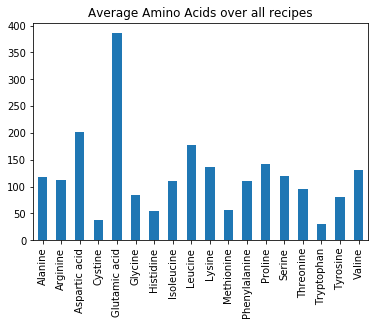

In [339]:
aa_list = []
for pro in amino_acids:
    aa_list.append(pro)

# calculate the mean values over all categories   
catmean = srni.groupby('category').mean()
# calculate the mean amino acid count over all categories
catmean.mean()[aa_list].plot.bar(rot=90)
plt.title('Average Amino Acids over all recipes')
plt.show()

In [340]:
# here's all the types of categories of the 
catmean.index.values

array(['Alcoholic Beverages', 'All Appetizer Recipes',
       'All Beverage Recipes', 'All Bread Recipes',
       'All Breakfast Recipes', 'All Condiment Recipes',
       'All Cookie Recipes', 'All Desert Recipes', 'All Salad Recipes',
       'All Soup and Stew Recipes', 'All Vegetable and Side Dish Recipes',
       'Asparagus', 'Baked Goods', 'Beef', 'Biscotti', 'Biscotti Recipes',
       'Biscuits and Scones', 'Bread Machine Recipes', 'Brownies',
       'Cajun', 'Cakes', 'Candy', 'Casseroles', 'Cereals', 'Cheesecakes',
       'Chicken Wings', 'Chili', 'Chinese', 'Chowders', 'Christmas',
       'Cincode Mayo', 'Crawfish', 'Cucumbers', 'Custards and Puddings',
       'Diabetic', 'Dips', 'Dips and Spreads', 'Dog Biscuits', 'Easter',
       'Eggs', 'Fish', 'Frosting', 'Fruit', 'German', 'Greek',
       'Home Brew', 'Indian', 'Italian', 'Jams and Jellies',
       'Just For Fun Recipes', 'Korean', 'Lamb', 'Marinades', 'Mexican',
       'Muffins', 'Nonalcoholic Beverages', 'Oysters', 'Pasta

In [341]:
# catmean.columns.values
aa_list

['Alanine',
 'Arginine',
 'Aspartic acid',
 'Cystine',
 'Glutamic acid',
 'Glycine',
 'Histidine',
 'Isoleucine',
 'Leucine',
 'Lysine',
 'Methionine',
 'Phenylalanine',
 'Proline',
 'Serine',
 'Threonine',
 'Tryptophan',
 'Tyrosine',
 'Valine']

In [368]:
sub_df.index.values

array(['Alcoholic Beverages', 'All Appetizer Recipes',
       'All Beverage Recipes', 'All Bread Recipes',
       'All Breakfast Recipes', 'All Condiment Recipes',
       'All Cookie Recipes', 'All Desert Recipes', 'All Salad Recipes',
       'All Soup and Stew Recipes', 'All Vegetable and Side Dish Recipes',
       'Asparagus', 'Baked Goods', 'Beef', 'Biscotti', 'Biscotti Recipes',
       'Biscuits and Scones', 'Bread Machine Recipes', 'Brownies',
       'Cajun', 'Cakes', 'Candy', 'Casseroles', 'Cereals', 'Cheesecakes',
       'Chicken Wings', 'Chili', 'Chinese', 'Chowders', 'Christmas',
       'Cincode Mayo', 'Crawfish', 'Cucumbers', 'Custards and Puddings',
       'Diabetic', 'Dips', 'Dips and Spreads', 'Dog Biscuits', 'Easter',
       'Eggs', 'Fish', 'Frosting', 'Fruit', 'German', 'Greek',
       'Home Brew', 'Indian', 'Italian', 'Jams and Jellies',
       'Just For Fun Recipes', 'Korean', 'Lamb', 'Marinades', 'Mexican',
       'Muffins', 'Nonalcoholic Beverages', 'Oysters', 'Pasta

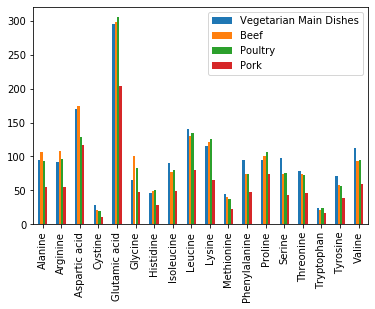

In [381]:
dfplots = pd.DataFrame({c:sub_df.loc[c][aa_list].values for c in ['Vegetarian Main Dishes','Beef','Poultry','Pork']}, index=aa_list)
ax= dfplots.plot.bar(rot=90)

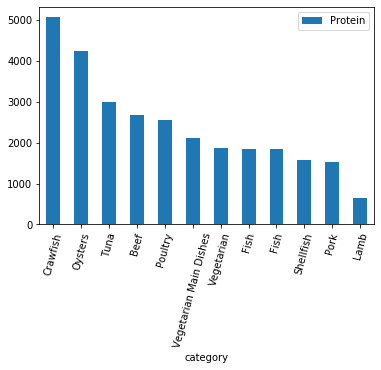

In [402]:
style = ['Vegetarian','Vegetarian Main Dishes','Beef','Fish','Poultry','Lamb','Pork','Shellfish','Fish','Tuna','Crawfish','Oysters']

sub_df = catmean.sort_values('Protein',axis=0,ascending=False)
sub_df = sub_df.loc[style].sort_values('Protein',ascending=False)
dfplots = pd.DataFrame(sub_df['Protein'])
ax= dfplots.plot.bar(rot=75)

In [ ]:
# catmean[aa_list]
# catmean.loc['Vegetarian'][aa_list].plot.bar(rot=90)
# plt.title('Average Amino Acids over Vegetarian recipes')
# plt.show()

# catmean.loc['Pork'][aa_list].plot.bar(rot=90)
# plt.title('Average Amino Acids over Pork recipes')
# plt.show()
# catmean.plot(x= aa_list,y=[''])

## TODO: COMBINE THESE TOGETHER
# catmean.plot(x=aa_list, y=['Vegetarian','Pork'], kind='bar')

In [344]:
# catsums.drop(columns = ['serving size','Total Vitamin A (IU)']).plot()
# plt.show()
catmean.sort_values(by='Ash',ascending=False)

,serving size,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-sitosterol,Betaine,Butanoic acid,Caffeine,...,Vitamin B12,Vitamin B6,Vitamin C,Vitamin D,Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E,Vitamin K,Water,"Zinc, Zn"
category,,,,,,,,,,,,,,,,,,,,,
Soups,4.530612,129.500083,23.969256,133.075904,6847.556423,246.637892,0.178950,1.449529,35.891407,0.024099,...,1.163351e-04,0.109351,4.292421,4.451002e-05,4.234915e-06,1.769531e-05,0.495304,2.103970e-02,20001.703166,1.203653
Stews,3.232558,223.132949,26.381025,252.080703,6186.417319,418.538475,2.833934,1.154239,32.579029,0.005210,...,1.891921e-04,0.232645,4.257149,2.520345e-05,2.379792e-06,1.558140e-07,0.897908,2.039550e-02,38189.182629,1.411184
All Soup and Stew Recipes,5.794118,92.515306,35.700482,95.852916,5861.257032,177.720960,0.065055,0.615822,28.292691,0.000000,...,1.054221e-04,0.078887,2.494078,3.095095e-05,3.140075e-06,1.739044e-05,0.333014,1.066924e-02,15486.134407,1.241404
Chili,7.717791,121.001204,19.033644,125.018855,3462.971825,188.241918,0.025871,0.124074,13.403211,0.084449,...,1.730175e-04,0.086429,1.378002,4.977500e-06,1.194825e-07,2.923668e-06,0.488819,4.314203e-03,14701.407832,1.783293
Chowders,4.500000,213.175120,4.602813,216.109771,2991.976830,408.883199,0.045048,1.779858,40.260088,0.000000,...,3.085225e-04,0.138342,3.233758,2.057449e-04,6.633771e-05,1.045250e-04,0.822383,2.207311e-02,25690.922963,1.322699
Crawfish,4.500000,210.858855,12.826719,224.150185,2759.944165,337.539728,1.122734,0.310356,75.000866,0.000000,...,1.173948e-04,0.073833,6.140463,2.425671e-05,1.354408e-06,1.871956e-05,0.554964,2.033871e-02,23710.408695,0.793670
Indian,2.400000,24.381329,0.000000,22.295427,2427.278590,51.725824,0.061056,0.036077,27.142586,0.000000,...,5.990969e-05,0.014605,0.215894,1.341750e-05,0.000000e+00,8.040000e-06,0.197885,3.082187e-03,5369.282180,0.335932
Sauces,2.857143,30.680973,337.840000,36.572870,2113.574628,73.649015,0.978285,0.062186,9.886390,0.000000,...,3.459623e-06,0.115556,7.972535,7.691786e-06,0.000000e+00,0.000000e+00,0.786296,2.058484e-02,44396.849412,0.500010
Casseroles,4.267442,202.152060,0.071411,203.585954,2065.313480,344.699712,0.789812,0.513173,50.735495,0.057437,...,6.359526e-04,0.091948,1.356791,3.200236e-04,7.793314e-07,3.008721e-04,0.347296,6.012816e-03,18148.513063,1.264795


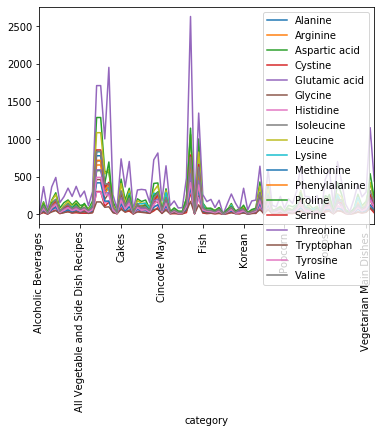

In [347]:
catmean[aa_list].plot(rot=90)
plt.show()

In [189]:
#     >> plot the 20 amino acids for one type of category
#<  plot the 20 amino acids for all types of categories
# plot a correlation histogram between vitamins/minerals/protein

# perform tsne on the data to see if it can be separable

# meal that has the most protein in it
# categories have the most protein in it

# meal/categories with most minerals in it

# Look for recipes with most Magnesium and B vitimins for Vegatarians
# (also protein)



In [264]:
ss_scale

0        1
1        8
2        1
3        1
4        1
5        8
6        1
7        1
8        1
9        8
10       6
11       1
12       2
13       2
14       1
15       2
16       4
17       1
18       2
19       1
20       1
21       4
22       1
23      25
24      72
25       1
26       1
27       1
28       8
29       1
        ..
5506    18
5507     7
5508    16
5509     6
5510     4
5511     1
5512     1
5513     4
5514     1
5515     1
5516     4
5517     1
5518     1
5519     1
5520     1
5521     8
5522     4
5523     4
5524     1
5525     1
5526     6
5527     1
5528     4
5529     1
5530     1
5531     4
5532     4
5533     1
5534     8
5535     4
Name: serving size, Length: 5536, dtype: int32

In [301]:
srni.to_csv('totals_to_graph.csv')